In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 21.5 MB/s eta 0:00:00


In [ ]:
save_path = '/content/drive/MyDrive/ThesisExperimentsFinal/Contrastive/HighEpoch/Densenet/'
save_path1 = '/content/drive/MyDrive/ThesisExperimentsFinal/Contrastive/HighEpoch/Densenet/'

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
from tqdm.notebook import tqdm
from zipfile import ZipFile
from imutils import paths
tf.random.set_seed(666)
np.random.seed(666)

tfds.disable_progress_bar()
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import tensorflow as tf
#import tensorflow_addons as tfa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob
import shutil
import pathlib
import random

#model selection
from sklearn.model_selection import train_test_split

#data augumentation
import  cv2
import imgaug
import imageio
from imgaug import augmenters as iaa

##
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from keras.applications import vgg16
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
from tqdm.notebook import tqdm
from zipfile import ZipFile
from imutils import paths
tf.random.set_seed(666)
np.random.seed(666)

tfds.disable_progress_bar()
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
from tqdm.notebook import tqdm
from zipfile import ZipFile
from imutils import paths
tf.random.set_seed(666)
np.random.seed(666)

tfds.disable_progress_bar()
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!unzip /content/drive/MyDrive/newDataset.zip

unzip:  cannot find or open /content/drive/MyDrive/newDataset.zip, /content/drive/MyDrive/newDataset.zip.zip or /content/drive/MyDrive/newDataset.zip.ZIP.


In [ ]:
#Run from here
import os
x_train = []
y_train = []
x_train = np.load("/content/drive/MyDrive/ThesisExperimentsFinal/Dataset/FinalData/TrainData.npy")
y_train = np.load("/content/drive/MyDrive/ThesisExperimentsFinal/Dataset/FinalData/TrainLabels.npy")

x_val = []
y_val = []
x_val = np.load("/content/drive/MyDrive/ThesisExperimentsFinal/Dataset/FinalData/ValData.npy")
y_val = np.load("/content/drive/MyDrive/ThesisExperimentsFinal/Dataset/FinalData/ValLabels.npy")

x_test = []
y_test = []
x_test = np.load("/content/drive/MyDrive/ThesisExperimentsFinal/Dataset/FinalData/TestData.npy")
y_test = np.load("/content/drive/MyDrive/ThesisExperimentsFinal/Dataset/FinalData/TestLabels.npy")

print(f"x_train shape: {x_train .shape} - y_train shape: {y_train .shape}")
print(f"x_val shape: {x_val.shape} - y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test .shape}")

x_train shape: (18123, 110, 110, 3) - y_train shape: (18123,)
x_val shape: (648, 110, 110, 3) - y_val shape: (648,)
x_test shape: (812, 110, 110, 3) - y_test shape: (812,)


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.02),
        layers.RandomWidth(0.2),
        layers.RandomHeight(0.2),
    ]
)

data_augmentation.layers[0].adapt(x_train)

In [ ]:
img_heigth, img_width = 110,110
input_shape = (img_heigth, img_width, 3)
num_classes = 5

In [ ]:
def create_encoder():
    vgg16 = keras.applications.densenet.DenseNet169(
        include_top=False, weights=None, input_shape=input_shape, pooling="avg"
    )

    inputs = keras.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    outputs = vgg16(augmented)
    model = keras.Model(inputs=inputs, outputs=outputs, name="densenet-encoder")
    return model


encoder = create_encoder()
encoder.summary()

learning_rate = 0.0001
batch_size = 32
hidden_units = 512
projection_units = 128
num_epochs = 50
dropout_rate = 0.5
temperature = 0.05

Model: "densenet-encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 110, 110, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     7         
                                                                 
 densenet169 (Functional)    (None, 1664)              12642880  
                                                                 
Total params: 12,642,887
Trainable params: 12,484,480
Non-trainable params: 158,407
_________________________________________________________________


In [ ]:
def create_classifier(encoder, trainable=True):

    for layer in encoder.layers:
        layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    features = encoder(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    outputs = layers.Dense(num_classes, activation="softmax")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="densenet-classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

In [ ]:
checkpointer = ModelCheckpoint(filepath='saved_models/baseline_model_densenet.hdf5', 
                               monitor='sparse_categorical_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=2, min_lr=1e-5)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [ ]:
encoder = create_encoder()
classifier = create_classifier(encoder)
classifier.summary()

history = classifier.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs,callbacks=callbacks)

Model: "densenet-classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 110, 110, 3)]     0         
                                                                 
 densenet-encoder (Functiona  (None, 1664)             12642887  
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 1664)              0         
                                                                 
 dense (Dense)               (None, 512)               852480    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                               

In [ ]:
classifier.save(save_path + 'Contrastive_Baseline_densenet.h5')
classifier.save_weights(save_path1 + "Weights_Contrastive_Baseline_densenet.h5")

26/26 [==============================] - 6s 109ms/step


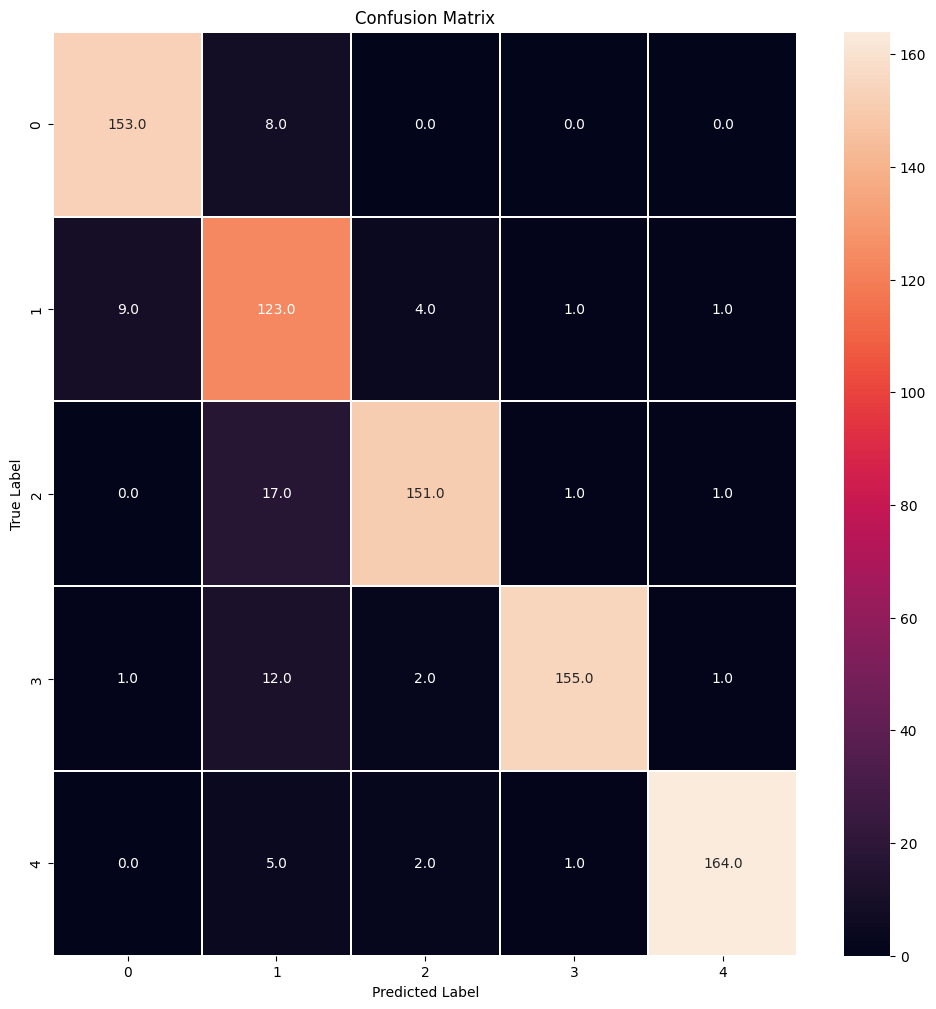

In [ ]:
pred = classifier.predict(x_test)

y_pred = np.argmax(pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, y_test)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
#ax.xaxis.set_ticklabels(x_test.class_indices)
#ax.yaxis.set_ticklabels(y_test)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report_base = classification_report(y_test, y_pred, output_dict=True)
df12 = pd.DataFrame(report_base).transpose()
df12

,precision,recall,f1-score,support
0,0.950311,0.938650,0.944444,163.000000
1,0.891304,0.745455,0.811881,165.000000
2,0.888235,0.949686,0.917933,159.000000
3,0.906433,0.981013,0.942249,158.000000
4,0.953488,0.982036,0.967552,167.000000
accuracy,0.918719,0.918719,0.918719,0.918719
macro avg,0.917954,0.919368,0.916812,812.000000
weighted avg,0.918281,0.918719,0.916641,812.000000


In [ ]:
from tensorflow.keras.models import load_model
baseline_dense=load_model(save_path + 'Contrastive_Baseline_densenet.h5')


In [ ]:
accuracy = baseline_dense.evaluate(x_test, y_test)[1]
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

26/26 [==============================] - 4s 49ms/step - loss: 0.3118 - sparse_categorical_accuracy: 0.9187
Test accuracy: 91.87%


In [ ]:
classifier=baseline_dense
y_predict = np.argmax(classifier.predict(x_test), axis=-1)

26/26 [==============================] - 4s 38ms/step


26/26 [==============================] - 1s 34ms/step


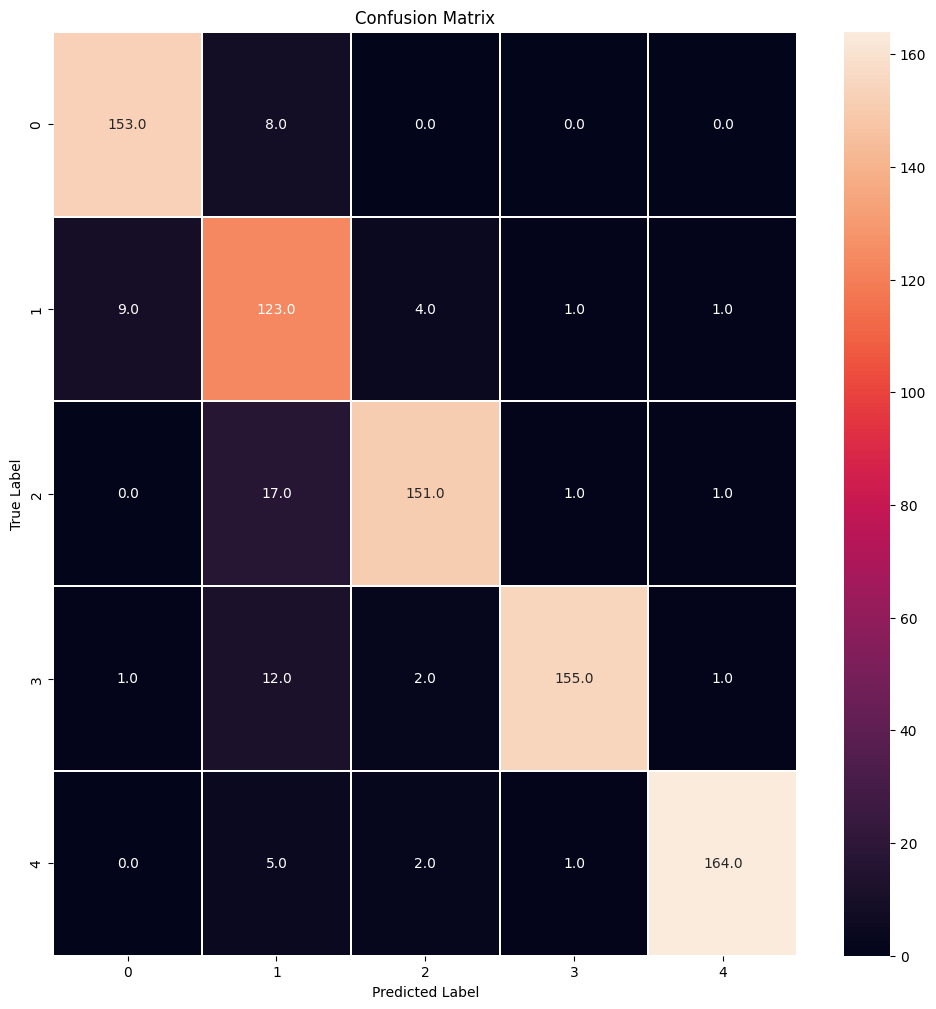

In [ ]:
cancer_classes=np.unique(y_test)

pred = baseline_dense.predict(x_test)

y_pred = np.argmax(pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, y_test)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(cancer_classes)
ax.yaxis.set_ticklabels(cancer_classes)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report_base = classification_report(y_test, y_pred, target_names=cancer_classes, output_dict=True)
df12 = pd.DataFrame(report_base).transpose()
df12

,precision,recall,f1-score,support
0,0.950311,0.938650,0.944444,163.000000
1,0.891304,0.745455,0.811881,165.000000
2,0.888235,0.949686,0.917933,159.000000
3,0.906433,0.981013,0.942249,158.000000
4,0.953488,0.982036,0.967552,167.000000
accuracy,0.918719,0.918719,0.918719,0.918719
macro avg,0.917954,0.919368,0.916812,812.000000
weighted avg,0.918281,0.918719,0.916641,812.000000


# N-pair loss

In [ ]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=1, name=None):
        super().__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        # Normalize feature vectors
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        # Compute logits
        logits = tf.divide(
            tf.matmul(
                feature_vectors_normalized, tf.transpose(feature_vectors_normalized)
            ),
            self.temperature,
        )
        return tfa.losses.npairs_loss(tf.squeeze(labels), logits)


def add_projection_head(encoder):
    inputs = keras.Input(shape=input_shape)
    features = encoder(inputs)
    outputs = layers.Dense(projection_units, activation="relu")(features)
    model = keras.Model(
        inputs=inputs, outputs=outputs, name="densenet-encoder_with_projection-head"
    )
    return model

In [ ]:
encoder = create_encoder()

encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=SupervisedContrastiveLoss(temperature),
)

encoder_with_projection_head.summary()

history = encoder_with_projection_head.fit(
    x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs
)

Model: "densenet-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 110, 110, 3)]     0         
                                                                 
 densenet-encoder (Functiona  (None, 1664)             12642887  
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 128)               213120    
                                                                 
Total params: 12,856,007
Trainable params: 12,697,600
Non-trainable params: 158,407
_________________________________________________________________
Epoch 1/50
567/567 [==============================] - 199s 154ms/step - loss: 3.1844
Epoch 2/50
567/567 [==============================] - 87s 154ms/step - loss: 3.0937
Epoch 3/50
567/567 [====================

In [ ]:
encoder_with_projection_head.save(save_path + 'Contrastive_npairloss_densent.h5')
encoder_with_projection_head.save_weights(save_path1 + "Weights_Contrastive_npairloss_densenet.h5")

In [ ]:
classifier = create_classifier(encoder, trainable=False)

history = classifier.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs,callbacks=callbacks)

Epoch 1/50
567/567 [==============================] - ETA: 0s - loss: 0.1772 - sparse_categorical_accuracy: 0.9438
Epoch 1: sparse_categorical_accuracy did not improve from 0.95663
567/567 [==============================] - 36s 43ms/step - loss: 0.1772 - sparse_categorical_accuracy: 0.9438 - lr: 1.0000e-04
Epoch 2/50
566/567 [============================>.] - ETA: 0s - loss: 0.0771 - sparse_categorical_accuracy: 0.9763
Epoch 2: sparse_categorical_accuracy improved from 0.95663 to 0.97622, saving model to saved_models/baseline_model_densenet.hdf5
567/567 [==============================] - 25s 45ms/step - loss: 0.0772 - sparse_categorical_accuracy: 0.9762 - lr: 1.0000e-04
Epoch 3/50
567/567 [==============================] - ETA: 0s - loss: 0.0708 - sparse_categorical_accuracy: 0.9781
Epoch 3: sparse_categorical_accuracy improved from 0.97622 to 0.97809, saving model to saved_models/baseline_model_densenet.hdf5
567/567 [==============================] - 26s 45ms/step - loss: 0.0708 - spa

In [ ]:
classifier.save(save_path + 'Contrastive_npair_densenet.h5')
classifier.save_weights(save_path1 + "Weights_Contrastive_npair_densenet.h5")

In [ ]:
accuracy = classifier.evaluate(x_test, y_test)[1]
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

26/26 [==============================] - 5s 51ms/step - loss: 0.3704 - sparse_categorical_accuracy: 0.9347
Test accuracy: 93.47%


In [ ]:
y_predict = np.argmax(classifier.predict(x_test), axis=-1)

26/26 [==============================] - 4s 38ms/step


In [ ]:
confusion_matrix(y_test, y_predict)

array([[155,   7,   0,   1,   0],
       [  7, 141,   7,   6,   4],
       [  0,   6, 147,   4,   2],
       [  0,   0,   3, 155,   0],
       [  0,   2,   3,   1, 161]])

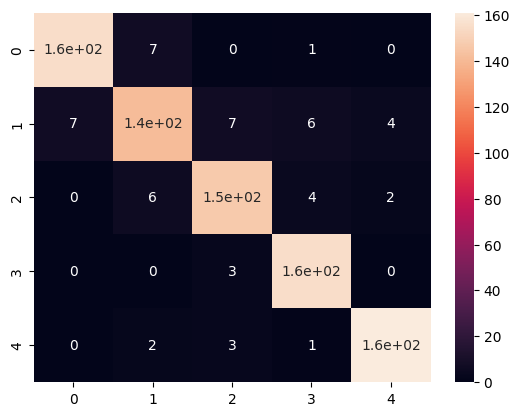

In [ ]:
cm = confusion_matrix(y_test, y_predict)
f = sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       163
           1       0.90      0.85      0.88       165
           2       0.92      0.92      0.92       159
           3       0.93      0.98      0.95       158
           4       0.96      0.96      0.96       167

    accuracy                           0.93       812
   macro avg       0.93      0.94      0.93       812
weighted avg       0.93      0.93      0.93       812



In [ ]:
classifier.save(save_path + 'Contrastive_npair_densenet.h5')
classifier.save_weights(save_path1 + "Weights_Contrastive_npair_densenet.h5")

In [ ]:
npair_dense=load_model(save_path + 'Contrastive_npair_densenet.h5')

In [ ]:
accuracy = npair_dense.evaluate(x_test, y_test)[1]
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

26/26 [==============================] - 4s 43ms/step - loss: 0.3704 - sparse_categorical_accuracy: 0.9347
Test accuracy: 93.47%


26/26 [==============================] - 4s 43ms/step


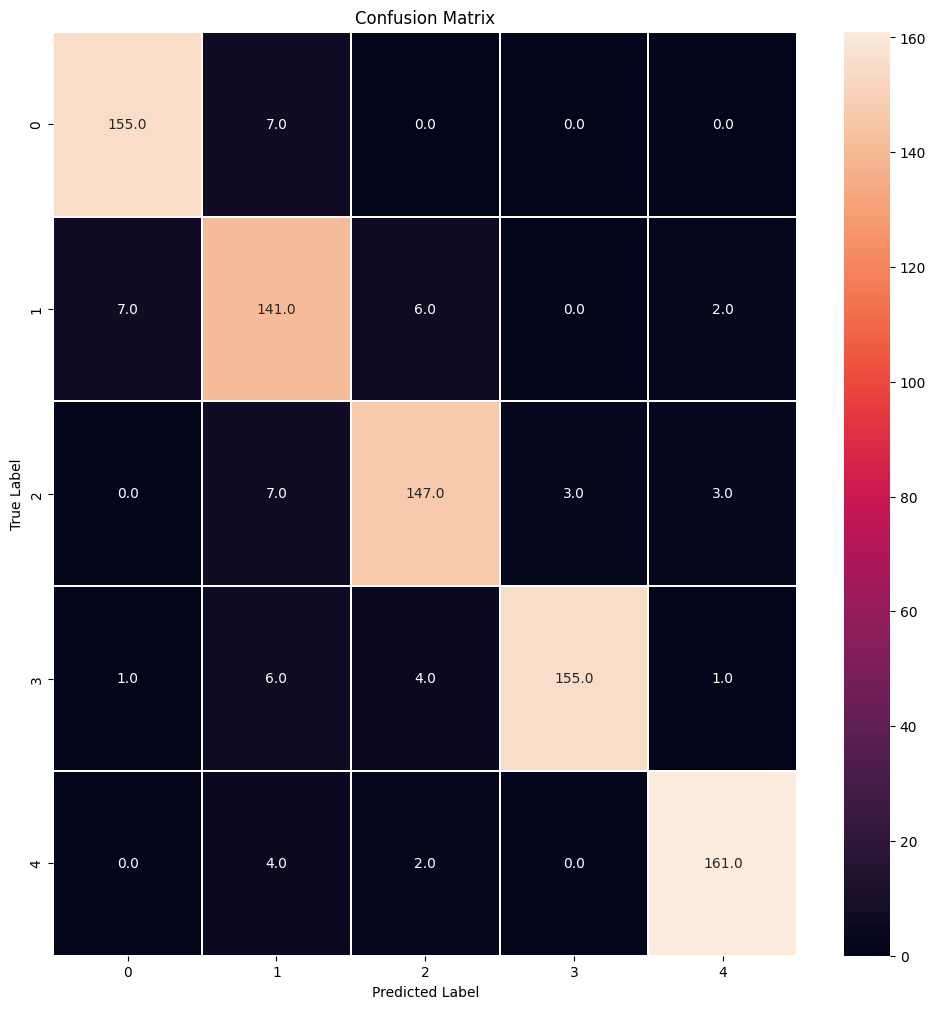

In [ ]:
pred = npair_dense.predict(x_test)
cancer_classes=np.unique(y_test)
y_pred = np.argmax(pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, y_test)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(cancer_classes)
ax.yaxis.set_ticklabels(cancer_classes)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report_npair = classification_report(y_test, y_pred, target_names=cancer_classes, output_dict=True)
df2 = pd.DataFrame(report_npair).transpose()
df2

,precision,recall,f1-score,support
0,0.956790,0.950920,0.953846,163.000000
1,0.903846,0.854545,0.878505,165.000000
2,0.918750,0.924528,0.921630,159.000000
3,0.928144,0.981013,0.953846,158.000000
4,0.964072,0.964072,0.964072,167.000000
accuracy,0.934729,0.934729,0.934729,0.934729
macro avg,0.934320,0.935016,0.934380,812.000000
weighted avg,0.934507,0.934729,0.934331,812.000000
